<a href="https://colab.research.google.com/github/shaluduggal/shaluduggal/blob/machinelearning/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import  LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor


In [ ]:
df=pd.read_csv('d:\\cardetailsv3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,NaN,CNG,Individual,Manual,Fourth & Above Owner,15.1 km/kg,1196 CC,73 bhp,101Nm@ 3000rpm,5.0
1,Maruti Swift LXI,2020,445000,1000.0,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
2,Maruti Swift LXI,2020,445000,1000.0,Petrol,Individual,Manual,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0
3,Hyundai Santro Magna,2020,500000,1000.0,Petrol,Individual,Manual,First Owner,20.3 kmpl,1086 CC,68.07 bhp,99.07Nm@ 4500rpm,5.0
4,Maruti Swift AMT VXI,2020,654000,1000.0,Petrol,Individual,Automatic,First Owner,21.21 kmpl,1197 CC,81.80 bhp,113Nm@ 4200rpm,5.0


In [ ]:
df['mileage']=df['mileage'].apply(lambda x: str(x).replace('kmpl',''))
df['mileage']=df['mileage'].apply(lambda x: str(x).replace('km/kg',''))

df['engine']=df['engine'].apply(lambda x: str(x).replace('CC',''))
df['max_power']=df['max_power'].apply(lambda x: str(x).replace(' bhp',''))
df['max_power']=df['max_power'].apply(lambda x: str(x).replace(' ','100'))

df.drop(['torque'],axis=1,inplace=True)
df.head(50)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,NaN,CNG,Individual,Manual,Fourth & Above Owner,15.1,1196,73,5.0
1,Maruti Swift LXI,2020,445000,1000.0,Petrol,Individual,Manual,First Owner,21.21,1197,81.80,5.0
2,Maruti Swift LXI,2020,445000,1000.0,Petrol,Individual,Manual,First Owner,21.21,1197,81.80,5.0
3,Hyundai Santro Magna,2020,500000,1000.0,Petrol,Individual,Manual,First Owner,20.3,1086,68.07,5.0
4,Maruti Swift AMT VXI,2020,654000,1000.0,Petrol,Individual,Automatic,First Owner,21.21,1197,81.80,5.0
5,Honda City i-VTEC CVT V,2018,1085000,1000.0,Petrol,Individual,Automatic,First Owner,18.0,1497,117.6,5.0
6,Toyota Innova Crysta 2.4 ZX AT,2020,2300000,1000.0,Diesel,Individual,Automatic,First Owner,13.68,2393,147.51,7.0
7,Datsun RediGO SV 1.0,2019,325000,1300.0,Petrol,Individual,Manual,First Owner,22.5,999,67,5.0
8,Honda Amaze S i-VTEC,2019,690000,1303.0,Petrol,Dealer,Manual,First Owner,17.8,1198,86.7,5.0
9,Honda Amaze S i-VTEC,2019,690000,1303.0,Petrol,Dealer,Manual,First Owner,17.8,1198,86.7,5.0


In [ ]:
df.dtypes
df = df.astype({"seller_type":'category'})
df = df.astype({"transmission":'category'})
df = df.astype({"owner":'category'})
df = df.astype({"mileage":'float64'})
df = df.astype({"engine":'float64'})




In [ ]:

df = df.astype({"max_power":'float64'})
df.dtypes

ValueError: could not convert string to float: 'CNG'

In [ ]:
#
print(df['fuel'].unique())
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())
#print(df['engine'].unique())
#print(df['max_power'].unique())
#print(df['torque'].unique())
#print(df['seats'].unique())
df.isnull().sum()

['CNG' 'Petrol' 'Diesel' 'LPG']
['Individual', 'Dealer', 'Trustmark Dealer']
Categories (3, object): ['Individual', 'Dealer', 'Trustmark Dealer']
['Manual', 'Automatic']
Categories (2, object): ['Manual', 'Automatic']
['Fourth & Above Owner', 'First Owner', 'Second Owner', 'Test Drive Car', 'Third Owner']
Categories (5, object): ['Fourth & Above Owner', 'First Owner', 'Second Owner', 'Test Drive Car', 'Third Owner']


name               0
year               0
selling_price      0
km_driven          1
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        221
seats            221
dtype: int64

In [ ]:
mean_value=df['seats'].mean()
x=round(mean_value)
df['seats'].fillna(value=x, inplace=True)

In [ ]:
mean_value=df['mileage'].mean()
x=round(mean_value)
df['mileage'].fillna(value=x, inplace=True)

In [ ]:
mean_value=df['engine'].mean()
x=round(mean_value)
df['engine'].fillna(value=x, inplace=True)

In [ ]:
mean_value=df['km_driven'].mean()
x=round(mean_value)
df['km_driven'].fillna(value=x, inplace=True)

In [ ]:
mean_value=df['max_power'].mean()
x=round(mean_value)
df['max_power'].fillna(value=x, inplace=True)

In [ ]:
df.isnull().sum()


selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
noofyrs          0
dtype: int64

In [ ]:
from datetime import date
day1=date.today()
currentyear=day1.year
df['curr_yr']=currentyear
df['noofyrs']=df['curr_yr']-df['year']


KeyError: 'year'

In [ ]:
df.drop(['name','year','curr_yr'],axis=1,inplace=True)

In [ ]:
lblencoder1=LabelEncoder()
lblencoder2=LabelEncoder()
lblencoder3=LabelEncoder()
lblencoder4=LabelEncoder()
df['seller_type']=lblencoder1.fit_transform(df['seller_type'])
df['transmission']=lblencoder2.fit_transform(df['transmission'])
df['fuel']=lblencoder4.fit_transform(df['fuel'])

df['owner']=lblencoder3.fit_transform(df['owner'])
df.head()



,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,noofyrs
0,209000,NaN,0,1,1,1,15.10,1196.0,73.00,5.0,10
1,445000,1000.0,3,1,1,0,21.21,1197.0,81.80,5.0,1
2,445000,1000.0,3,1,1,0,21.21,1197.0,81.80,5.0,1
3,500000,1000.0,3,1,1,0,20.30,1086.0,68.07,5.0,1
4,654000,1000.0,3,1,0,0,21.21,1197.0,81.80,5.0,1


In [ ]:
print(df['seller_type'].unique())
print(df['transmission'].unique())
print(df['owner'].unique())


[1 0 2]
[1 0]
[1 0 2 3 4]


In [ ]:
import seaborn as sns
import matplotlib.pyplot  as plt

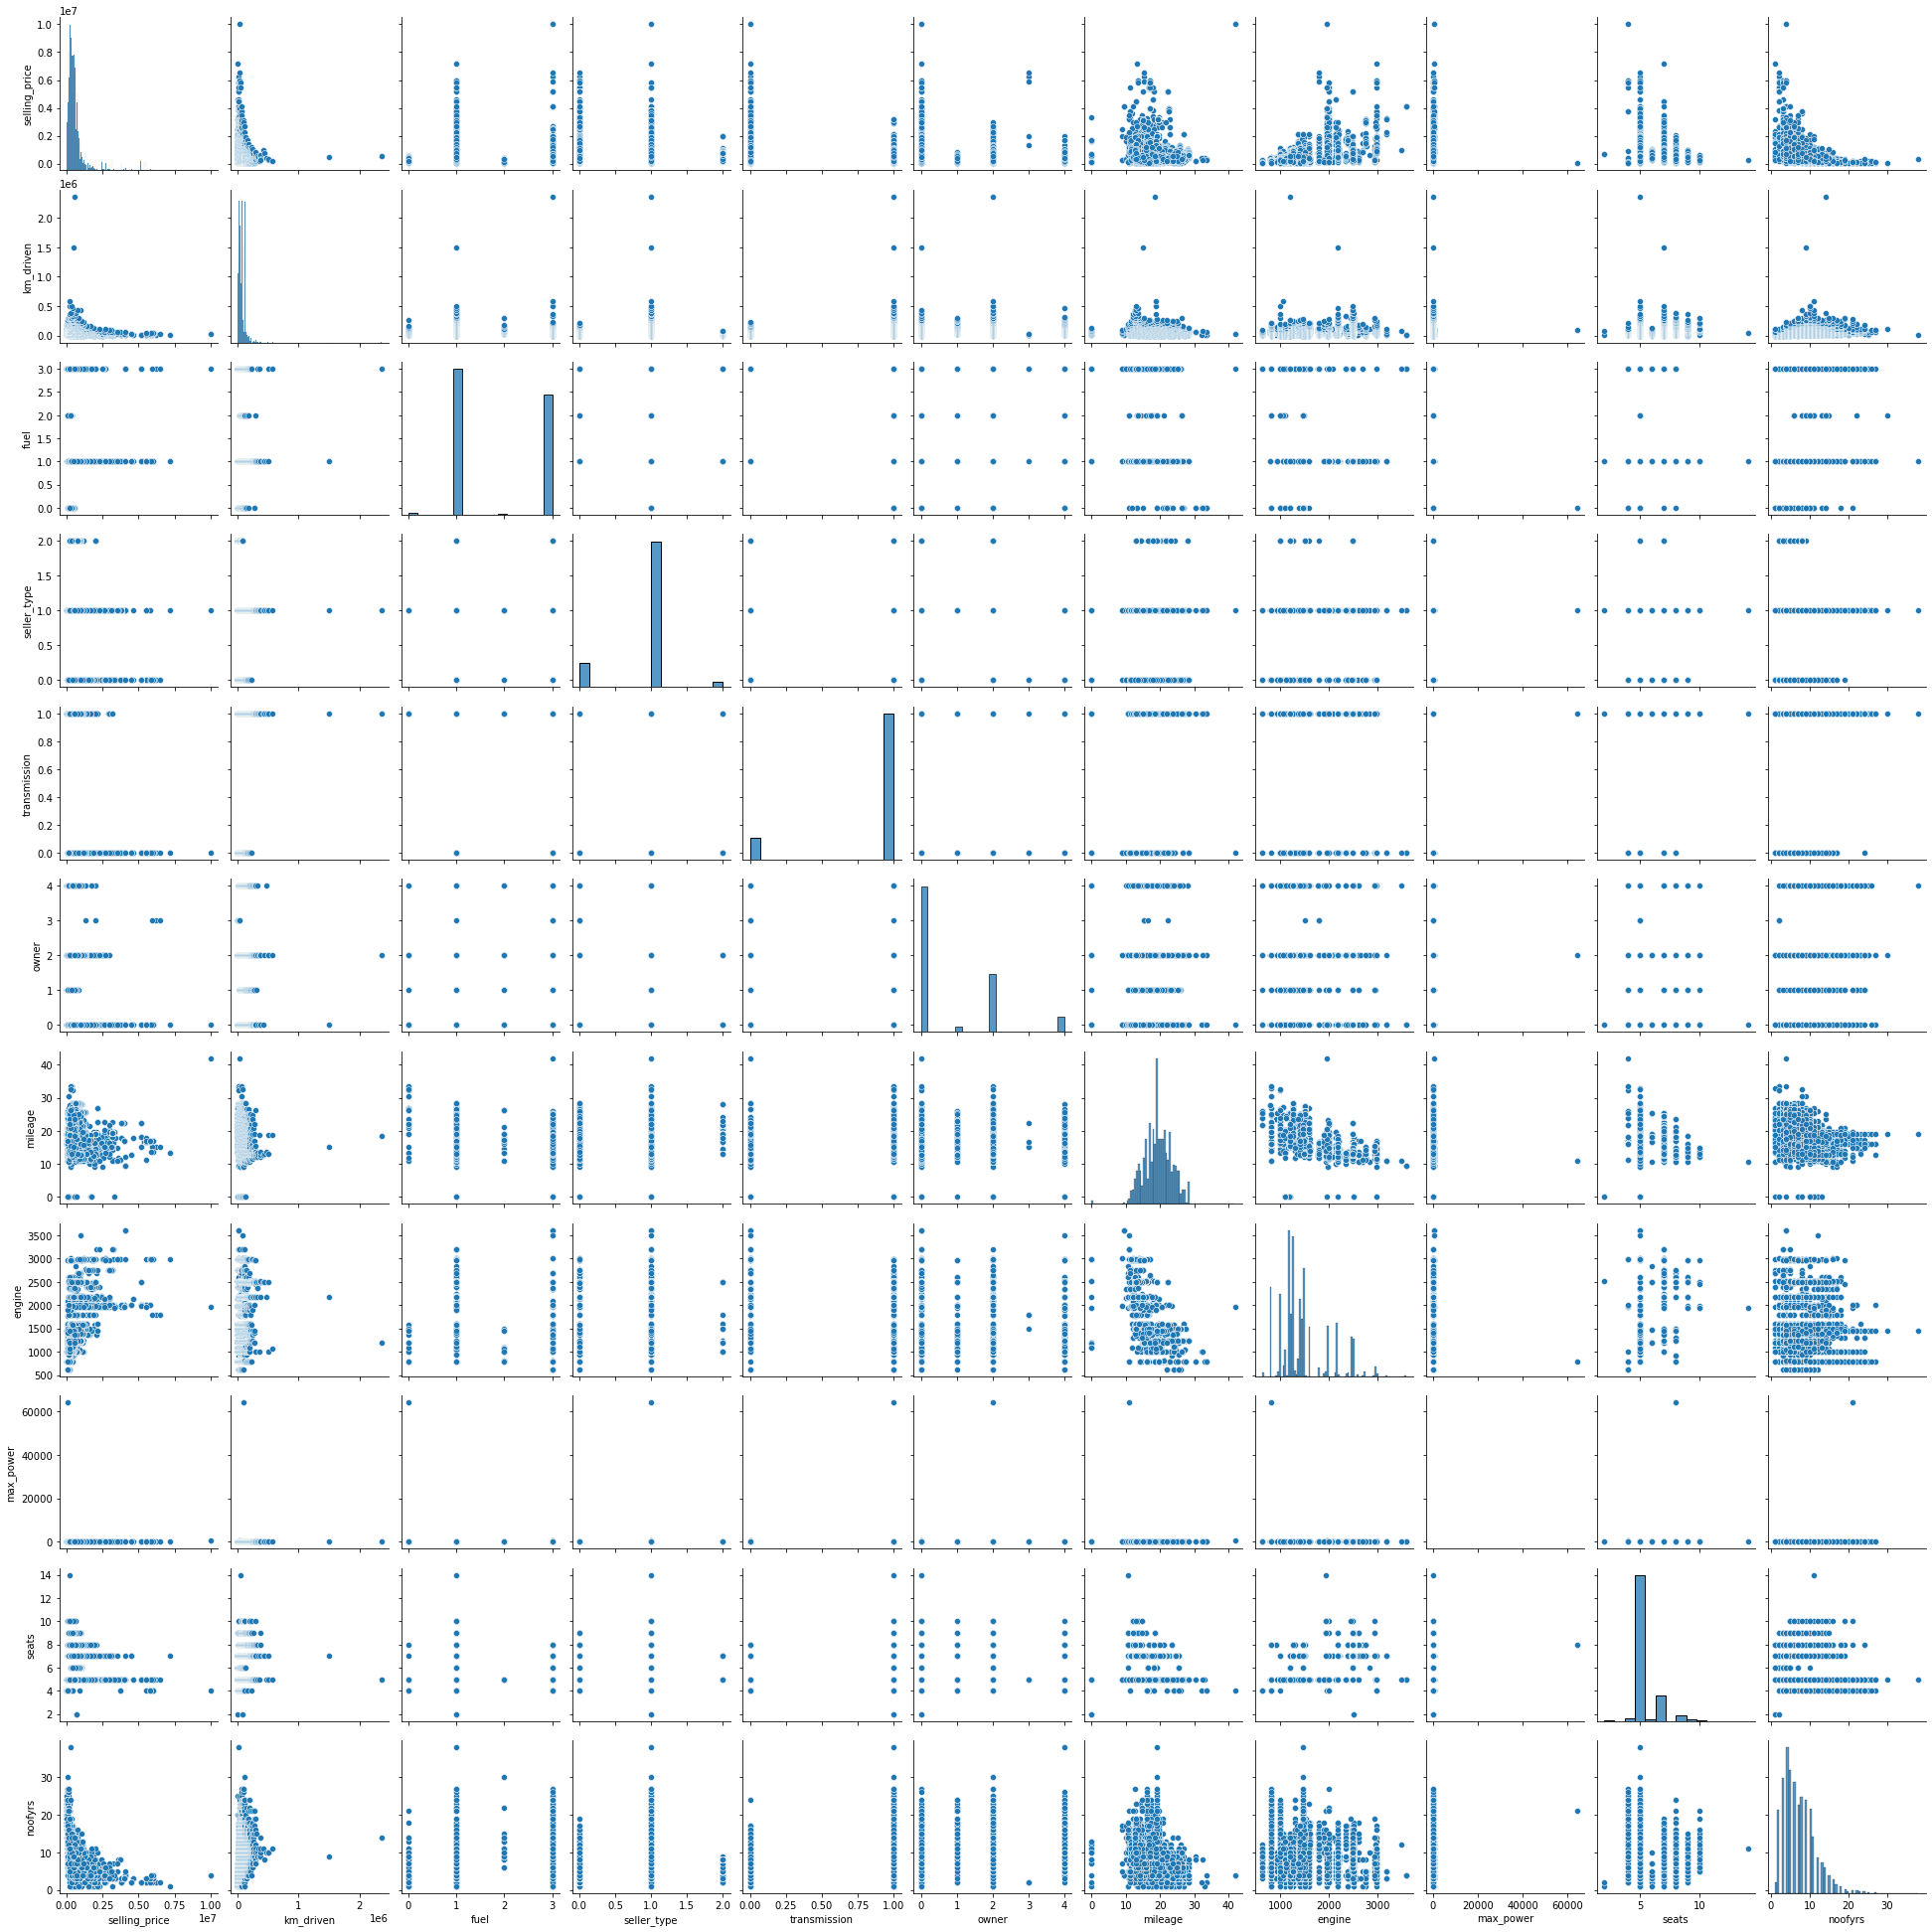

In [ ]:
sns.pairplot(df)

               selling_price  km_driven      fuel  seller_type  transmission  \
selling_price       1.000000  -0.225640 -0.194029    -0.335857     -0.588845   
km_driven          -0.225640   1.000000 -0.266247     0.122159      0.201308   
fuel               -0.194029  -0.266247  1.000000     0.110512     -0.035255   
seller_type        -0.335857   0.122159  0.110512     1.000000      0.227871   
transmission       -0.588845   0.201308 -0.035255     0.227871      1.000000   
owner              -0.229174   0.280390 -0.022339     0.143443      0.147458   
mileage            -0.123980  -0.172728 -0.081995    -0.019945      0.177029   
engine              0.453556   0.203905 -0.479017    -0.091252     -0.281615   
max_power           0.029313   0.004196 -0.035175    -0.009193     -0.022501   
seats               0.047135   0.219818 -0.337575     0.051546      0.069070   
noofyrs            -0.414092   0.418162  0.050312     0.146042      0.244707   

                  owner   mileage    en

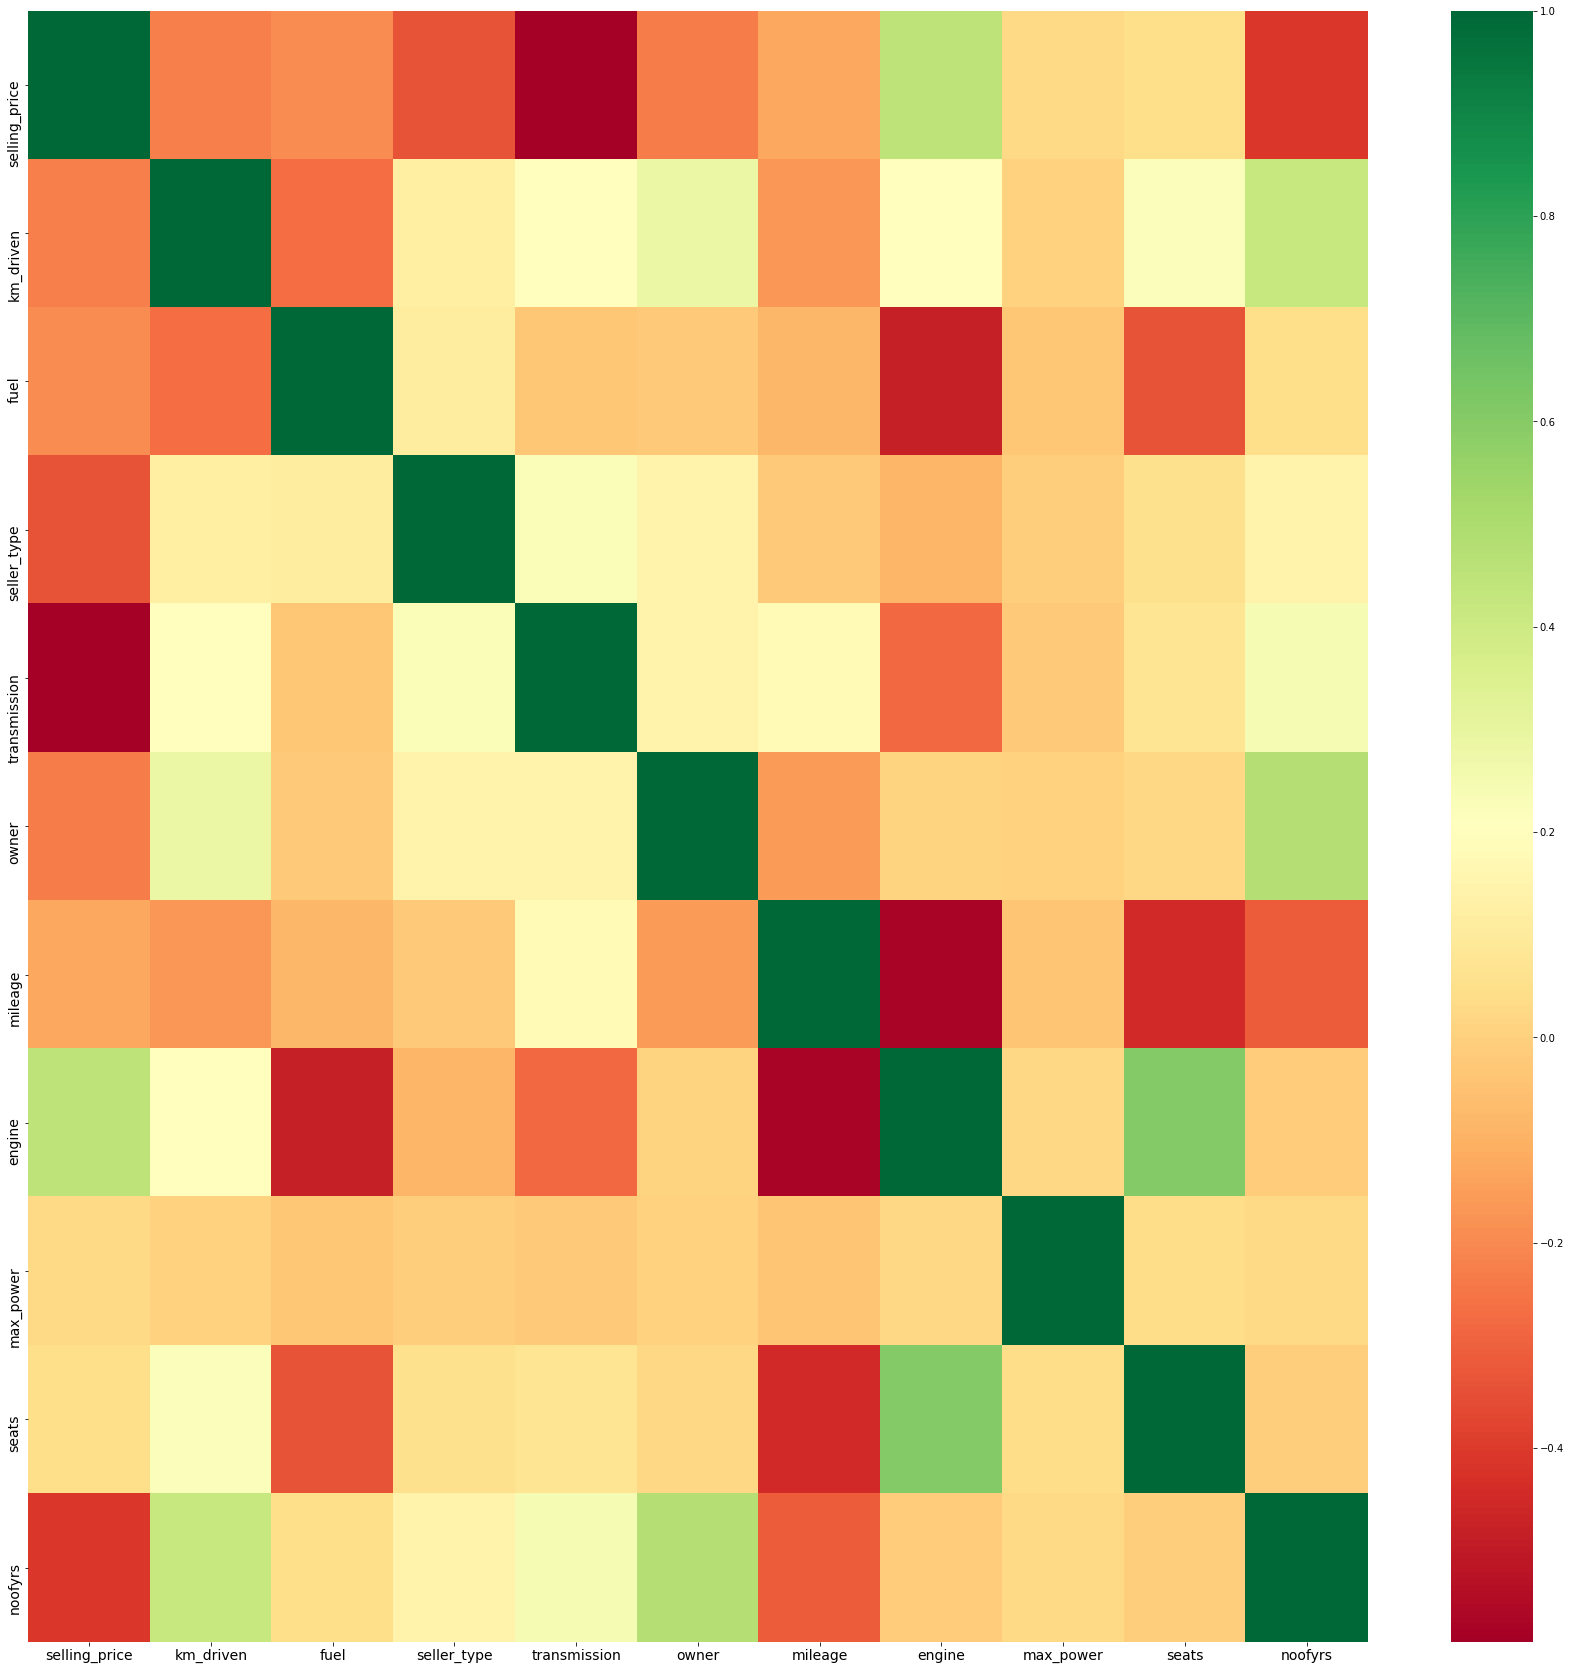

In [ ]:
corr1=df.corr()
print(corr1)
topindex=corr1.index
plt.figure(figsize=(30,30))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
g=sns.heatmap(corr1,cmap='RdYlGn',)

In [ ]:
df.dtypes


selling_price      int64
km_driven        float64
fuel               int32
seller_type        int32
transmission       int32
owner              int32
mileage          float64
engine           float64
max_power        float64
seats            float64
noofyrs            int64
curr_yr            int64
dtype: object

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]
x

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,noofyrs,curr_yr
0,69828.0,0,1,1,1,15.10,1196.0,73.00,5.0,10,2021
1,1000.0,3,1,1,0,21.21,1197.0,81.80,5.0,1,2021
2,1000.0,3,1,1,0,21.21,1197.0,81.80,5.0,1,2021
3,1000.0,3,1,1,0,20.30,1086.0,68.07,5.0,1,2021
4,1000.0,3,1,0,0,21.21,1197.0,81.80,5.0,1,2021
...,...,...,...,...,...,...,...,...,...,...,...
8123,500000.0,3,1,1,2,18.90,998.0,67.10,5.0,10,2021
8124,500000.0,1,1,1,2,12.99,2494.0,100.57,7.0,10,2021
8125,577414.0,3,1,1,2,18.90,1061.0,67.00,5.0,11,2021
8126,1500000.0,1,1,1,0,15.10,2179.0,140.00,7.0,9,2021


[0.04660094 0.04486098 0.04697447 0.34687775 0.01570183 0.02612912
 0.1055859  0.20921919 0.01214989 0.14589992 0.        ]


<AxesSubplot:>

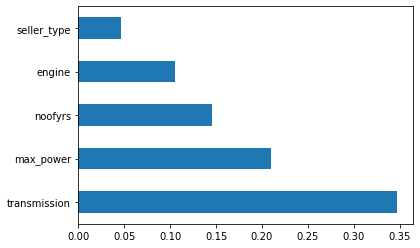

In [ ]:
#important feature of the model evaluation
model=ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)
feat_importances=pd.Series(model.feature_importances_,index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')

In [ ]:
x_tr,x_tst,y_tr,y_tst=train_test_split(x,y,test_size=0.3)
x_tr.shape

(5689, 11)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#hyperparameter
n_estimators=[int(x1) for  x1 in np.linspace(start=100,stop=1200,num=12) ]
#maximum no of feat at each split
max_feat=['auto','sqrt']
max_depth=[int(x2) for x2 in np.linspace(start=5,stop=30,num=6)]
min_sample_split=[2,5,10,20,50,100]
min_sample_leaf=[1,2,5,10,20]
#rf.fit(x_tr,y_tr)

In [ ]:
#creatrandom grid
rand_grid={'max_features':max_feat,
          'max_depth':max_depth,
          'n_estimators':n_estimators,
          'min_samples_split':min_sample_split,
          'min_samples_leaf':min_sample_leaf}
print(rand_grid)

{'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'min_samples_split': [2, 5, 10, 20, 50, 100], 'min_samples_leaf': [1, 2, 5, 10, 20]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=rand_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42)
rf_random.fit(x_tr,y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=  10.9s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=  10.6s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=  10.8s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=  11.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=10, total=  11.0s
[CV] n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30 
[CV]  n_estimators=500, min_samples_split=10, min_samples_leaf=5, max_features=auto, max_depth=30, total=   8.5s
[CV] n_estimators=500, min_samples_s

[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   9.2s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   9.1s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   9.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   9.0s
[CV] n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=600, min_samples_split=10, min_samples_leaf=10, max_features=auto, max_depth=15, total=   9.0s
[CV] n_estimators=200, min_samples

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, 20],
                                        'min_samples_split': [2, 5, 10, 20, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

[654798.22393468 316335.26097825 216144.13723115 ... 642469.93178477
 213807.78174591 676524.0162991 ]


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

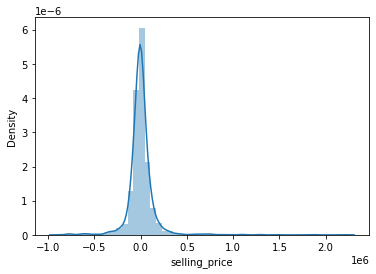

In [ ]:
y_pr=rf_random.predict(x_tst)
print(y_pr)
sns.distplot(y_tst-y_pr)

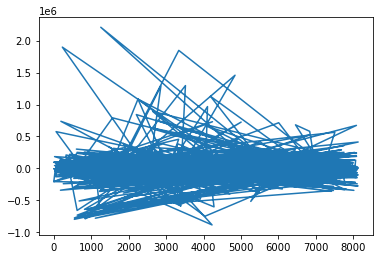

In [ ]:
plt.plot(y_tst-y_pr)


In [ ]:
import pickle
#open file to store data
file=open('car_price_prediction.pkl','wb')
pickle.dump(rf_random,file)